**CURSO**: Análisis Geoespacial, Departamento de Geociencias y Medio Ambiente, Universidad Nacional de Colombia - sede Medellín <br/>
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from GeoPandas official library web page, the course *Introduction to Python GIS* organized by [CSC Finland - IT Center for Science](https://automating-gis-processes.github.io/CSC18/index.html) and several other sources. Every effort has been made to trace copyright holders of the materials used in this book. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions. 

# Spatial operations

## Geopandas
[GeoPandas](https://geopandas.org/) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

In [30]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import geopandas as gpd

In [31]:
fp = "data/Barrios.shp"
db = gpd.read_file(fp)

In [32]:
type(db)

geopandas.geodataframe.GeoDataFrame

In [34]:
db.info

<bound method DataFrame.info of      OBJECTID ID_BARRIO           S_NOMBARRI ID_MPIO    ID_CONBARR ID_COMUNA  \
0           1        14             San Jose     266  052660000014        00   
1           2        11               La Paz     266  052660000011        00   
2           3        15   Loma de Las Brujas     266  052660000015        00   
3           4        10            Primavera     266  052660000010        00   
4           5        17            El Chocho     266  052660000017        00   
..        ...       ...                  ...     ...           ...       ...   
503       504        02    Niquía Bifamiliar     088  050880000702        07   
504       505        04    Altos de Quitasol     088  050880000704        07   
505       506        01           El Mirador     088  050880000701        07   
506       507        01         Panamaricano     088  050880000801        08   
507       508        03  Ciudadela del Norte     088  050880000803        08   

       

In [9]:
db.describe()

,OBJECTID
count,508.000000
mean,254.500000
std,146.791235
min,1.000000
25%,127.750000
50%,254.500000
75%,381.250000
max,508.000000


In [35]:
db.head(2)

,OBJECTID,ID_BARRIO,S_NOMBARRI,ID_MPIO,ID_CONBARR,ID_COMUNA,geometry
0,1,14,San Jose,266,052660000014,00,"POLYGON ((-75.58064 6.16393, -75.58057 6.16369..."
1,2,11,La Paz,266,052660000011,00,"POLYGON ((-75.58988 6.16203, -75.59002 6.16135..."


In [11]:
gdf = db[['S_NOMBARRI', 'geometry']]
gdf.head()

,S_NOMBARRI,geometry
0,San Jose,"POLYGON ((-75.58064 6.16393, -75.58057 6.16369..."
1,La Paz,"POLYGON ((-75.58988 6.16203, -75.59002 6.16135..."
2,Loma de Las Brujas,"POLYGON ((-75.57953 6.16595, -75.57946 6.16594..."
3,Primavera,"POLYGON ((-75.59583 6.16409, -75.59594 6.16391..."
4,El Chocho,"POLYGON ((-75.56484 6.16712, -75.56477 6.16712..."


In [8]:
 gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

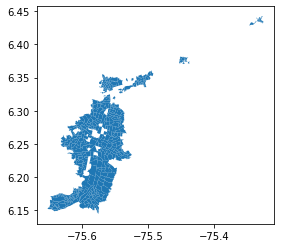

In [12]:
gdf.plot();

Calculating the areas of polygons is really easy in geopandas by using GeoDataFrame.area attribute:

In [36]:
# Set the GeoDataFrame's coordinate system to MAGNA-SIRGAS / Colombia Bogota zone [ projected ] [ EPSG:3116 ]
In [27]: gdf = gdf.to_crs("EPSG:3116")
gdf.crs

<Projected CRS: EPSG:3116>
Name: MAGNA-SIRGAS / Colombia Bogota zone
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Colombia - onshore between 1°30'W and 1°30'E of Bogota (75°35'W and 72°35'W of Greenwich).
- bounds: (-75.59, -2.51, -72.58, 11.82)
Coordinate Operation:
- name: Colombia MAGNA Bogota zone
- method: Transverse Mercator
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

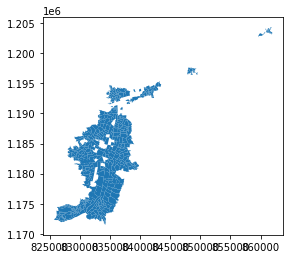

In [15]:
gdf.plot()

In [37]:
gdf['area'] = gdf.area
gdf.head()

,S_NOMBARRI,geometry,area
0,San Jose,"POLYGON ((833614.319 1173600.227, 833622.269 1...",0.367515
1,La Paz,"POLYGON ((832590.217 1173392.727, 832574.647 1...",0.337170
2,Loma de Las Brujas,"POLYGON ((833738.197 1173823.839, 833745.204 1...",0.286157
3,Primavera,"POLYGON ((831932.931 1173622.786, 831920.040 1...",0.231351
4,El Chocho,"POLYGON ((835364.977 1173948.692, 835372.870 1...",0.256830


In [14]:
gdf.max()

S_NOMBARRI           Zuniga
area          1799602.79242
dtype: object

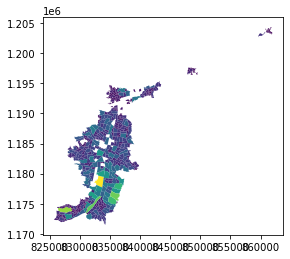

In [17]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1)
gdf.plot(column="area", ax=ax)
plt.show()

In [39]:
import pandas as pd
df = pd.read_csv("data/barrios1.csv", header=0)
df.head()

,S_NOMBARRI,SHAPE_Leng,SHAPE_Area
0,San Jose,3047.058332,367515.2776
1,La Paz,2780.181666,337169.8578
2,Loma de Las Brujas,2660.995035,286156.5117
3,Primavera,1929.741489,231351.4507
4,El Chocho,2380.625464,256830.2183


In [40]:
type(df)

pandas.core.frame.DataFrame

## Spatial Operations in DataFrames
### Join
Join columns with other DataFrame either on index or on a key column. Efficiently join multiple DataFrame objects by index at once by passing a list.

In [43]:
gdf.head(2)

,S_NOMBARRI,geometry,area
0,San Jose,"POLYGON ((833614.319 1173600.227, 833622.269 1...",0.367515
1,La Paz,"POLYGON ((832590.217 1173392.727, 832574.647 1...",0.337170


In [42]:
gdf2=gdf.set_index('S_NOMBARRI')
gdf2.head(2)

,geometry,area
S_NOMBARRI,,
San Jose,"POLYGON ((833614.319 1173600.227, 833622.269 1...",0.367515
La Paz,"POLYGON ((832590.217 1173392.727, 832574.647 1...",0.337170


In [45]:
join = gdf.set_index('S_NOMBARRI').join(df.set_index('S_NOMBARRI'))
join.head(2)

,geometry,area,SHAPE_Leng,SHAPE_Area
S_NOMBARRI,,,,
19 de Abril,"POLYGON ((827802.410 1174894.029, 827818.881 1...",0.123492,1826.818097,123491.74220
Acevedo,"POLYGON ((836770.012 1189982.652, 836774.049 1...",0.066455,1393.438069,66454.74593


In [23]:
type(join)

geopandas.geodataframe.GeoDataFrame

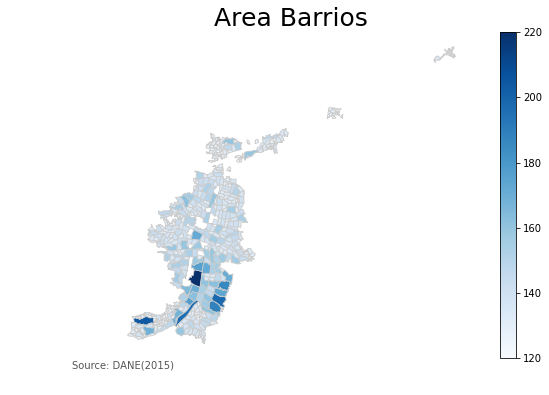

In [46]:
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 6))
join.plot(column="area", cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Area Barrios', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})
ax.annotate('Source: DANE(2015)',xy=(0.1, .08), xycoords='figure fraction',horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


#fig.savefig('data/testmap.png', dpi=300)


In [22]:
query = join.loc[(join['area'] > 2000) & (join['SHAPE_Leng'] < 2500), :]
query

,geometry,area,SHAPE_Leng,SHAPE_Area
S_NOMBARRI,,,,
19 de Abril,"POLYGON ((827802.410 1174894.029, 827818.881 1...",123491.742229,1826.818097,123491.74220
Acevedo,"POLYGON ((836770.012 1189982.652, 836774.049 1...",66454.745925,1393.438069,66454.74593
Aguas Calientes,"POLYGON ((861699.852 1203650.686, 861704.335 1...",52530.219066,1152.228281,52530.21907
Alcala,"POLYGON ((832622.165 1174506.010, 832638.803 1...",279923.564699,2105.730272,279923.56470
Alcalá,"POLYGON ((838459.986 1192127.327, 838451.036 1...",51656.320380,1420.320662,51656.32038
...,...,...,...,...
Villa Turbay,"POLYGON ((839524.719 1181607.740, 839523.748 1...",247586.846325,2415.458210,247586.84630
Villagrande,"POLYGON ((833535.576 1175537.453, 833517.773 1...",225077.241048,2338.751934,225077.24110
Villas del Sol,"POLYGON ((835175.573 1194670.270, 835196.277 1...",105343.908904,1360.826832,105343.90890


In [23]:
type(query)

geopandas.geodataframe.GeoDataFrame

In [24]:
db_sorted = join.sort_values('area', ascending=False)
db_sorted.head()

,geometry,area,SHAPE_Leng,SHAPE_Area
S_NOMBARRI,,,,
Campo Amor,"POLYGON ((833096.057 1179653.172, 833116.869 1...",1.799603e+06,6010.576881,1.799603e+06
Ditares,"POLYGON ((827932.310 1174453.301, 827946.881 1...",1.519342e+06,6956.247332,1.519342e+06
Los Balsos No.1,"POLYGON ((836064.147 1176679.294, 836065.898 1...",1.405491e+06,5789.697058,1.405491e+06
Las Vegas,"POLYGON ((831216.144 1173522.013, 831136.361 1...",1.368880e+06,1560.065340,1.187706e+05
Las Vegas,"POLYGON ((831216.144 1173522.013, 831136.361 1...",1.368880e+06,8120.898027,1.368880e+06


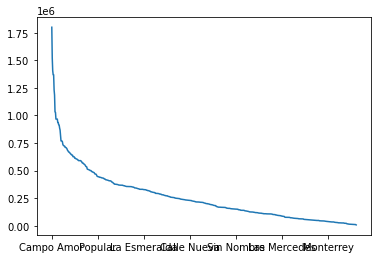

In [54]:
_ = join['area'].sort_values(ascending=False).plot()

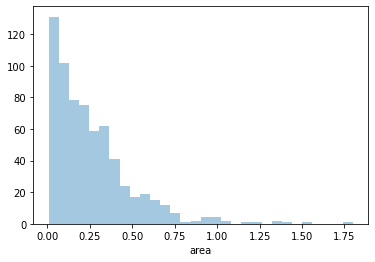

In [49]:
import seaborn as sns
_ = sns.distplot(join['area'], kde=False)

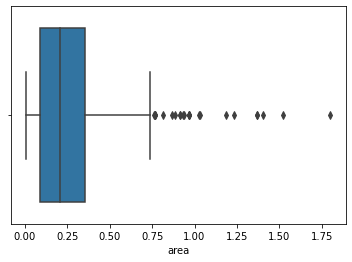

In [55]:
sns.boxplot(join['area']);

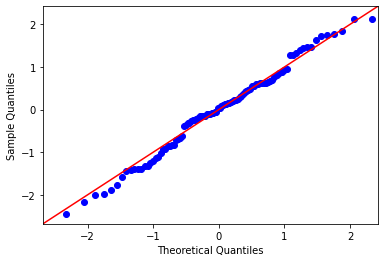

In [28]:
import statsmodels.api as sm
import pylab as py
import numpy as np

data_points = np.random.normal(0, 1, 100) 

sm.qqplot(data_points, line ='45')
py.show()

In [29]:
data_points

array([ 0.63953711,  0.56064517,  0.11858262,  1.28442851, -1.43881473,
       -1.99008432,  0.87841649, -0.71079389, -0.68802219,  0.15914582,
        2.11915298,  1.63614426,  0.14006262,  0.85009657, -1.25160448,
        0.69574886, -1.33505129, -1.02923115,  0.21451039,  0.3012565 ,
        0.12452951, -0.93388604, -1.38685798, -0.32323066, -2.00608905,
        0.19011653,  1.33083042, -0.06969091,  1.84786394,  0.62072768,
       -0.25558998, -0.1610123 ,  0.23047155, -0.86262021, -0.85386969,
       -1.40556251, -0.05445943, -0.18881032,  1.75087188,  0.63103666,
        0.94651951,  0.60500072,  0.62425856, -1.14776753, -1.113237  ,
       -0.10335515,  0.14483628,  0.25841276,  0.60689917, -0.08475717,
       -0.35294555, -0.3056981 ,  1.39138697, -0.82285297,  0.49103206,
       -2.17189872,  1.7385542 ,  0.67666496, -0.10708511,  0.91994084,
        0.36095448,  0.0264973 , -0.10733427, -1.88078694,  0.40671044,
        0.44556103, -0.91740555,  0.55051633,  0.76393823, -0.39

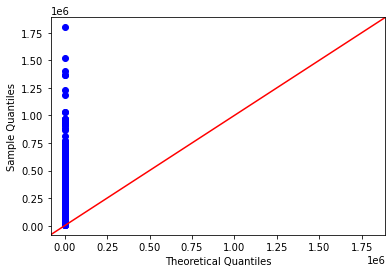

In [61]:
sm.qqplot(merged['area'], line ='45')
py.show()

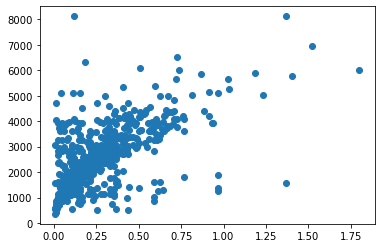

In [56]:
plt.scatter(join['area'], join['SHAPE_Leng'])

## Spatial operation in GeoDataFrames

In [57]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

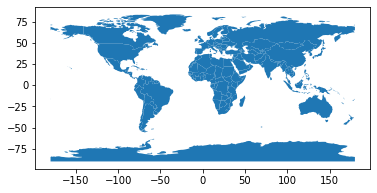

In [58]:
world.plot()

In [60]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


<AxesSubplot:>

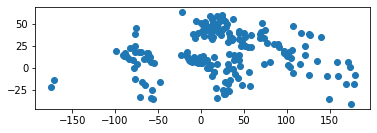

In [34]:
cities.plot()

In [61]:
# For attribute join
country_shapes = world[['geometry', 'iso_a3']]

country_names = world[['name', 'iso_a3']]

# For spatial join
countries = world[['geometry', 'name']]

countries = countries.rename(columns={'name':'country'})

In [65]:
countries.head(2)

,geometry,country
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania


In [66]:
countries.country

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: country, Length: 177, dtype: object

In [62]:
country_shapes.head(2)

,geometry,iso_a3
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA


In [41]:
type(country_shapes)

geopandas.geodataframe.GeoDataFrame

### Appending
Appending GeoDataFrames and GeoSeries uses pandas append methods. Keep in mind, that appended geometry columns needs to have the same CRS.

In [29]:
# Appending GeoSeries
appending = world.geometry.append(cities.geometry)
appending.sample(10)

86     POLYGON ((47.97452 29.97582, 48.18319 29.53448...
118                          POINT (149.12903 -35.28303)
91                           POINT (178.44171 -18.13302)
21     MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...
56     POLYGON ((2.69170 6.25882, 2.74906 7.87073, 2....
156    POLYGON ((-58.16639 -20.17670, -57.87067 -20.7...
160                            POINT (13.23248 -8.83634)
85     POLYGON ((50.81011 24.75474, 50.74391 25.48242...
175                            POINT (13.39960 52.52376)
22                            POINT (-61.38701 15.30102)
dtype: geometry

<AxesSubplot:>

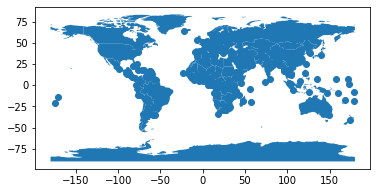

In [46]:
joined.plot()

In [67]:
# Appending GeoDataFrames
europe = world[world.continent == 'Europe']
asia = world[world.continent == 'Asia']
eurasia = europe.append(asia)
eurasia.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
125,3047987,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.17476 37.74969, 126.23734 37.840..."
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
124,80845215,Asia,Turkey,TUR,1670000.0,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37..."
129,11491346,Europe,Belgium,BEL,508600.0,"POLYGON ((6.15666 50.80372, 6.04307 50.12805, ..."


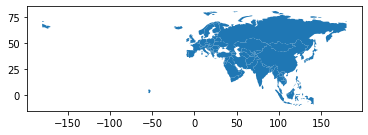

In [50]:
eurasia.plot();

### Attribute Joins
Attribute joins are accomplished using the merge method. In general, it is recommended to use the merge method called from the spatial dataset. With that said, the stand-alone merge function will work if the GeoDataFrame is in the left argument; if a DataFrame is in the left argument and a GeoDataFrame is in the right position, the result will no longer be a GeoDataFrame.

For example, consider the following merge that adds full names to a GeoDataFrame that initially has only ISO codes for each country by merging it with a pandas DataFrame.

In [51]:
# `country_shapes` is GeoDataFrame with country shapes and iso codes
country_shapes.head()

,geometry,iso_a3
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",ESH
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA


In [52]:
# `country_names` is DataFrame with country names and iso codes
country_names.head()

,name,iso_a3
0,Fiji,FJI
1,Tanzania,TZA
2,W. Sahara,ESH
3,Canada,CAN
4,United States of America,USA


In [68]:
# Merge with `merge` method on shared variable (iso codes):
country_shapes = country_shapes.merge(country_names, on='iso_a3')
country_shapes.head()

,geometry,iso_a3,name
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,Fiji
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,Tanzania
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",ESH,W. Sahara
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,Canada
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,United States of America


In [84]:
type(country_shapes)

geopandas.geodataframe.GeoDataFrame

In [54]:
# Merge with `merge` method on shared variable (iso codes):
country_sample = country_names.merge(country_shapes, on='iso_a3')
country_sample.head()

,name_x,iso_a3,geometry,name_y
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
1,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania
2,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America


In [58]:
type(country_sample)

pandas.core.frame.DataFrame

### Spatial Joins
In a Spatial Join, two geometry objects are merged based on their spatial relationship to one another. sjoin() has two core arguments: how and op.

**op**: The op argument specifies how geopandas decides whether or not to join the attributes of one object to another, based on their geometric relationship. The values for op correspond to the names of geometric binary predicates and depend on the spatial index implementation. The default spatial index in GeoPandas currently supports the following values for op:

* intersects
* contains
* within
* touches
* crosses
* overlaps

**how**: The how argument specifies the type of join that will occur and which geometry is retained in the resultant geodataframe. It accepts the following options:

* left: use the index from the first (or left_df) geodataframe that you provide to sjoin; retain only the left_df geometry column
* right: use index from second (or right_df); retain only the right_df geometry column
* inner: use intersection of index values from both geodataframes; retain only the left_df geometry column

In [59]:
countries.head()

,geometry,country
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America


In [60]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


In [65]:
cities_with_country = gpd.sjoin(cities, countries, how="inner", op='intersects')
cities_with_country.head()

,name,geometry,index_right,country
0,Vatican City,POINT (12.45339 41.90328),141,Italy
1,San Marino,POINT (12.44177 43.93610),141,Italy
192,Rome,POINT (12.48131 41.89790),141,Italy
2,Vaduz,POINT (9.51667 47.13372),114,Austria
184,Vienna,POINT (16.36469 48.20196),114,Austria


<AxesSubplot:>

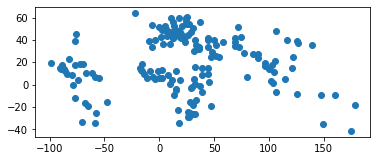

In [66]:
cities_with_country.plot()

### Buffer

Buffer analysis is an important geoprocessing task. It is used widely in many domains to get a distance around a point/Line/Polygon. One tricky thing here is you need to know which CRS/projection you are using to get the correct output you want. If your data is not projected into projection where meters are used, then the output will not be in meters. This is a classical error in the world of Geodata. You can use this resource to find out which crs you need and which units are used: http://spatialreference.org/ref/epsg/sweref99-tm/

<AxesSubplot:>

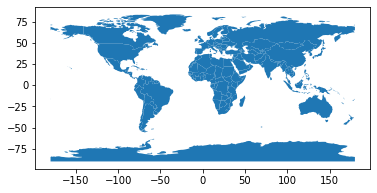

In [67]:
countries.plot()

In [73]:
country_centroids = countries.geometry.centroid
country_centroids.head()

0    POINT (163.85316 -17.31631)
1      POINT (34.75299 -6.25773)
2     POINT (-12.13783 24.29117)
3     POINT (-98.14238 61.46908)
4    POINT (-112.59944 45.70563)
dtype: geometry

<AxesSubplot:>

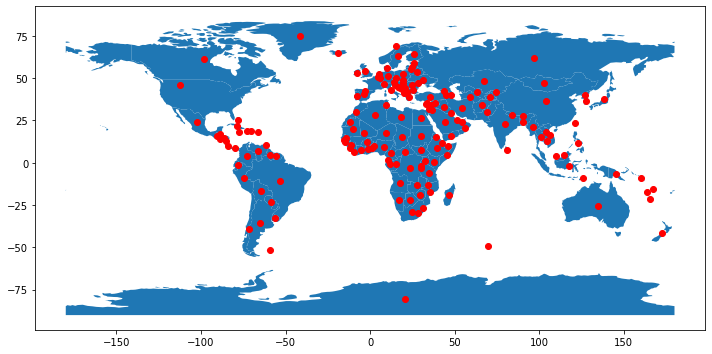

In [76]:
fig, ax = plt.subplots(figsize=(12,10))
countries.plot(ax=ax)
country_centroids.plot(ax=ax, color='red') 

<AxesSubplot:>

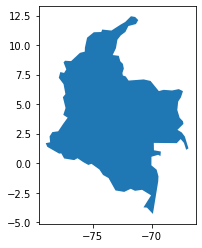

In [70]:
# Subset data to get only the country you
colombia = world[world["name"] == "Colombia"]
colombia.plot()

In [93]:
colombia_centroid = colombia.geometry.centroid
colombia_centroid

32    POINT (-73.07773 3.92721)
dtype: geometry

<AxesSubplot:>

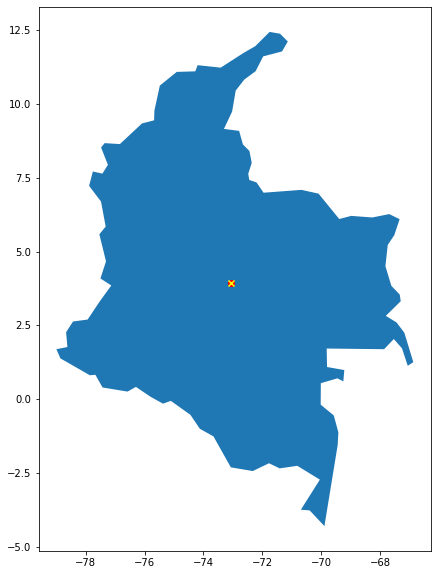

In [101]:
fig, ax = plt.subplots(figsize=(12,10))
colombia.plot(ax=ax)
colombia_centroid_projected.to_crs("EPSG:4326").plot(ax=ax, color='red')
colombia_centroid.plot(ax=ax, marker="x",color='yellow')

In [83]:
colombia.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

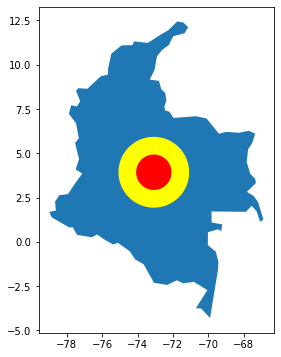

In [84]:
# Let us create a buffer of 1 & 2 degrees and plot them
colombia_centroids_1degree = colombia_centroid.buffer(1)
colombia_centroids_2degree = colombia_centroid.buffer(2)

fig, ax = plt.subplots(figsize=(8,6))
colombia.plot(ax=ax)
colombia_centroids_2degree.plot(ax=ax, color='yellow')
colombia_centroids_1degree.plot(ax=ax, color='red')
plt.show()

In [96]:
colombia_centroid_projected = colombia_centroid.to_crs({'init': 'epsg:3116'})
colombia_projected = colombia.to_crs({'init': 'epsg:3116'})
colombia_centroid_projected.crs

<Projected CRS: +init=epsg:3116 +type=crs>
Name: MAGNA-SIRGAS / Colombia Bogota zone
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Colombia - 75°35'W to 72°35'W
- bounds: (-75.59, -2.51, -72.58, 11.82)
Coordinate Operation:
- name: Colombia MAGNA Bogota zone
- method: Transverse Mercator
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

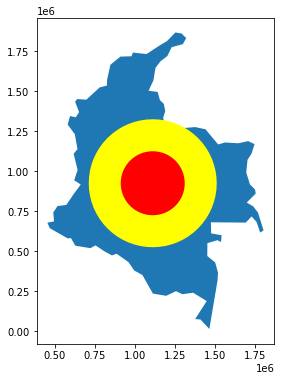

In [102]:
colombia_centroids_200km = colombia_centroid_projected.buffer(200000)
colombia_centroids_400km = colombia_centroid_projected.buffer(400000)

fig, ax = plt.subplots(figsize=(8,6))
colombia_projected.plot(ax=ax)
colombia_centroids_400km.plot(ax=ax, color='yellow')
colombia_centroids_200km.plot(ax=ax, color='red')

plt.show()

## Overlay operations

We sometimes need to create new features out of different data types like Points, Lines and Polygons. Set operations or Overlays play an important role here.

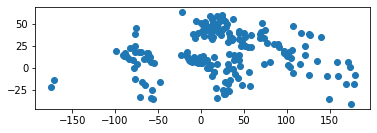

In [103]:
cities.plot();

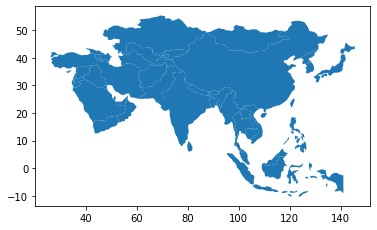

In [118]:
# Select Asia
asia = world[world['continent'] == "Asia"]
asia = asia[['geometry', 'name']]

asia.plot();

In [119]:
# Project to crs that uses meters as distance measure
asia = asia.to_crs("epsg:3395") 
cities = cities.to_crs("epsg:3395")
cities.head()

,name,geometry
0,Vatican City,POINT (1386304.649 5117957.424)
1,San Marino,POINT (1385011.519 5425900.277)
2,Vaduz,POINT (1059390.800 5932596.001)
3,Luxembourg,POINT (682388.791 6346728.171)
4,Palikir,POINT (17605174.611 766692.137)


In [120]:
cities['geometry']= cities.buffer(500000)
cities.head()

,name,geometry
0,Vatican City,"POLYGON ((1886304.649 5117957.424, 1883897.012..."
1,San Marino,"POLYGON ((1885011.519 5425900.277, 1882603.882..."
2,Vaduz,"POLYGON ((1559390.800 5932596.001, 1556983.163..."
3,Luxembourg,"POLYGON ((1182388.791 6346728.171, 1179981.154..."
4,Palikir,"POLYGON ((18105174.611 766692.137, 18102766.97..."


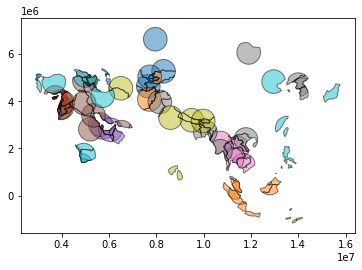

In [121]:
asia_cores = gpd.overlay(asia, cities, how='intersection')
asia_cores.plot(alpha=0.5, edgecolor='k', cmap='tab10');

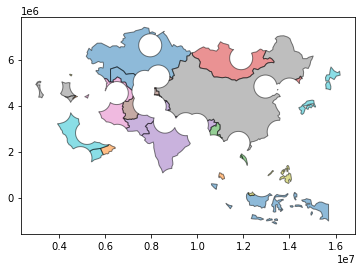

In [122]:
asia_peripheries = gpd.overlay(asia, cities, how='difference')
asia_peripheries.plot(alpha=0.5, edgecolor='k', cmap='tab10');